In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

n=10, time: 0.0


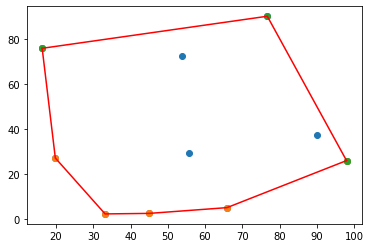

n=30, time: 0.000997781753540039


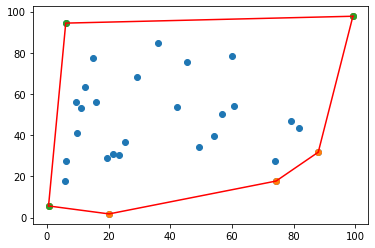

n=50, time: 0.0


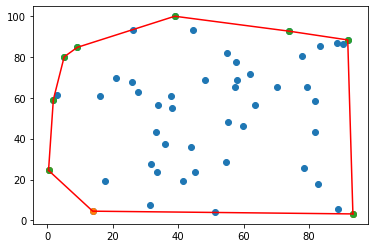

n=70, time: 0.0


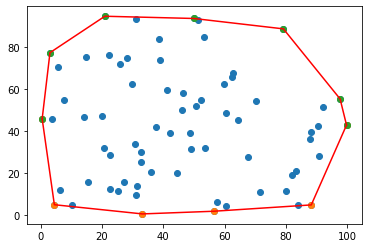

n=90, time: 0.0


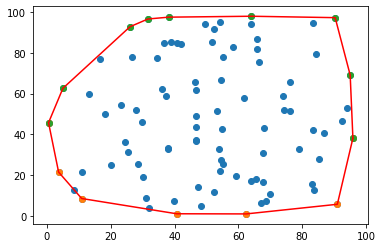

In [4]:
def xy(a):
    a_x = [x[0] for x in a]
    a_y = [x[1] for x in a]
    return a_x, a_y

def inclination(p1, p2): # 상하 반전
    return p2[0] - p1[0], p2[1] - p1[1]
 
def ccw(p1, p2, p3): # CCW
    v, u = inclination(p1, p2), inclination(p2, p3)
    if v[0] * u[1] > v[1] * u[0]:
        return True
    return False
     
def convex_hull(positions):
    convex = list()
    for p3 in positions:
        while len(convex) >= 2:
            p1, p2 = convex[-2], convex[-1]
            if ccw(p1, p2, p3):
                break
            convex.pop()
        convex.append(p3)
    
    return  convex

aa = [10,30,50,70,90]
timetime = []

for n in aa:
    positions = np.random.uniform(low=0.0, high=100.0, size=(n,2)).tolist()
    positions = [tuple(x) for x in positions]
    positions = sorted(positions, key=lambda pos:(pos[0], pos[1]))
    start = time.time()
    lower_hulls = set(convex_hull(positions))
    positions.reverse()
    temp = set(convex_hull(positions))
    upper_hulls = temp - lower_hulls
    timetime.append(time.time() - start)
    print("n={}, time:".format(n), time.time() - start)

    lower_hulls = sorted(list(lower_hulls),key=lambda x: x[0])
    upper_hulls = sorted(list(upper_hulls),key=lambda x: x[0])
    
    if lower_hulls[0][0] < upper_hulls[0][0]:
        upper_hulls.insert(0,lower_hulls[0])
    else:
        lower_hulls.insert(0,upper_hulls[0])
        
    if lower_hulls[-1][0] < upper_hulls[-1][0]:
        lower_hulls.append(upper_hulls[-1])
    else:
        upper_hulls.append(lower_hulls[-1])
    
    positions_x, positions_y = xy(positions)
    lower_x,lower_y = xy(lower_hulls)
    upper_x,upper_y = xy(upper_hulls)    
    
    plt.scatter(positions_x,positions_y)
    plt.scatter(lower_x,lower_y)
    plt.plot(lower_x,lower_y,'r')
    plt.scatter(upper_x,upper_y)
    plt.plot(upper_x,upper_y,'r')
    plt.show()

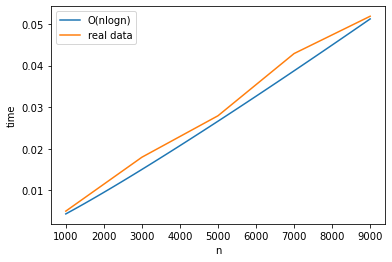

In [66]:
x = np.linspace(1000,9000)
plt.plot(x,x*np.log(x)/1600000,label='O(nlogn)')
plt.plot(aa,timetime,label='real data')
plt.xlabel("n")
plt.ylabel("time")
plt.legend()
plt.show()

n=1000, time: 5.228586912155151


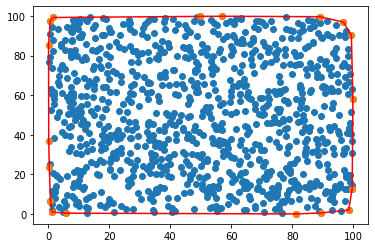

n=3000, time: 43.21872568130493


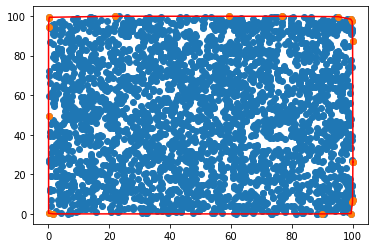

n=5000, time: 93.87679624557495


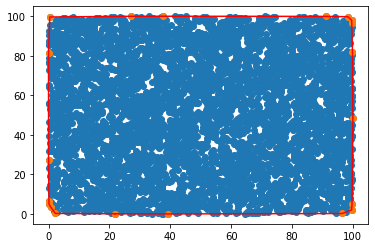

n=7000, time: 168.12062335014343


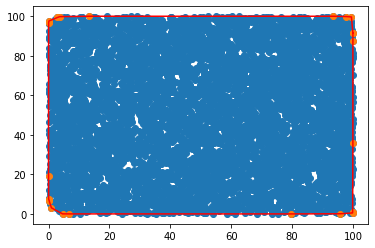

n=9000, time: 439.44296741485596


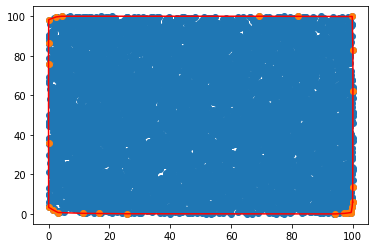

In [70]:
def ccw(p1,p2,p3):
    return (p2[0]-p1[0]) * (p3[1]-p1[1]) - (p2[1]-p1[1]) * (p3[0]-p1[0])

timetime = []
for n in aa:
    tail = []
    head = []
    hull = []
    positions = np.random.uniform(low=0.0, high=100.0, size=(n,2)).tolist()
    positions = [tuple(x) for x in positions]
    start = time.time()
    for i in range(n):
        for j in range(n):
            if positions[i] == positions[j]:
                continue
            onHull = True
            for k in range(n):
                if positions[k] == positions[i] or positions[k] == positions[j]:
                    continue
                if ccw(positions[i],positions[j],positions[k]) < 0:
                    onHull = False
                    break
            if onHull:
                tail.append(i)
                head.append(j)    

    idx = 0
    hull.append(positions[tail[idx]])
    hull.append(positions[head[idx]])
    while head[idx] != tail[0]:
        for s in range(len(head)):
            if tail[s] == head[idx]:
                idx = s
                hull.append(positions[head[idx]])
                break

    timetime.append(time.time() - start)
    print("n={}, time:".format(n), time.time() - start)
    
    positions_x, positions_y = xy(positions)
    hull_x, hull_y = xy(hull)

    plt.scatter(positions_x,positions_y)
    plt.scatter(hull_x,hull_y)
    plt.plot(hull_x,hull_y,'r')
    plt.show()


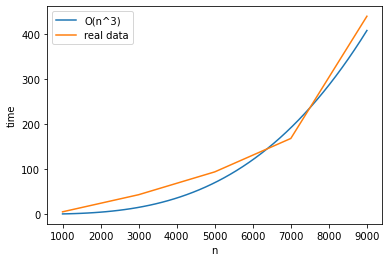

In [98]:
x = np.linspace(1000,9000)
plt.plot(x,x**3/10**9.2523,label='O(n^3)')
plt.plot(aa,timetime,label='real data')
plt.xlabel("n")
plt.ylabel("time")
plt.legend()
plt.show()

In [99]:
def OBST(p, q, n):
    main = [[0 for _ in range(n+1)] for _ in range(n+2)]
    w = [[0 for _ in range(n+1)] for _ in range(n+2)]
    root = [[0 for _ in range(n+1)] for _ in range(n+1)]

    for i in range(1,n+2):
        main[i][i-1] = q[i-1]
        w[i][i-1] = q[i-1]

    for l in range(1,n+1):
        for i in range(1,n-l+2):
            j = i + l - 1
            main[i][j] = 9999999
            w[i][j] = round(w[i][j-1] + p[j] + q[j],3)
            for r in range(i,j+1):
                t = round(main[i][r-1] + main[r+1][j] + w[i][j],3)
                if t < main[i][j]:
                    main[i][j] = t
                    root[i][j] = r
    return main, root

In [100]:
p = [0, 0.04, 0.06, 0.08, 0.02, 0.10, 0.12, 0.14]
q = [0.06, 0.06, 0.06, 0.06, 0.05, 0.05, 0.05, 0.05,]
n = 7
main,root = OBST(p,q,n)

In [101]:
main

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0.06, 0.28, 0.62, 1.02, 1.34, 1.83, 2.44, 3.12],
 [0, 0.06, 0.3, 0.68, 0.93, 1.41, 1.96, 2.61],
 [0, 0, 0.06, 0.32, 0.57, 1.04, 1.48, 2.13],
 [0, 0, 0, 0.06, 0.24, 0.57, 1.01, 1.55],
 [0, 0, 0, 0, 0.05, 0.3, 0.72, 1.2],
 [0, 0, 0, 0, 0, 0.05, 0.32, 0.78],
 [0, 0, 0, 0, 0, 0, 0.05, 0.34],
 [0, 0, 0, 0, 0, 0, 0, 0.05]]

In [102]:
root

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 2, 2, 2, 3, 3, 5],
 [0, 0, 2, 3, 3, 3, 5, 5],
 [0, 0, 0, 3, 3, 4, 5, 5],
 [0, 0, 0, 0, 4, 5, 5, 6],
 [0, 0, 0, 0, 0, 5, 6, 6],
 [0, 0, 0, 0, 0, 0, 6, 7],
 [0, 0, 0, 0, 0, 0, 0, 7]]